# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Understanding Data

In [2]:
# Loading Dataset
df = pd.read_csv("mushrooms.csv")

In [3]:
# Showing Dataset
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
# This code randomly selects 7 rows from the DataFrame 'df' and returns them as a new DataFrame
df.sample(7)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
3913     p         f           f         y       f    f               f   
3151     e         f           y         e       t    n               f   
1000     e         x           f         g       t    n               f   
2605     p         x           f         g       f    f               f   
3208     p         x           f         g       f    f               f   
5898     e         f           s         e       t    n               f   
4299     p         f           y         y       f    f               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
3913            c         b          g  ...                        k   
3151            c         b          n  ...                        s   
1000            c         b          n  ...                        s   
2605            c         b          g  ...                        k   
3208            c         b          h  ...                        k   
5898            c         b          e  ...                        s   
4299            c         b          g  ...                        k   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
3913                      p                      b         p          w   
3151                      g                      p         p          w   
1000                      p                      p         p          w   
2605                      p                      n         p          w   
3208                      n                      n         p          w   
5898                      w                      w         p          w   
4299                      b                      n         p          w   

     ring-number ring-type spore-print-color population habitat  
3913           o         l                 h          y       g  
3151           o         p                 n          y       d  
1000           o         p                 k          y       d  
2605           o         l                 h          v       p  
3208           o         l                 h          v       g  
5898           t         e                 w          c       w  
4299           o         l                 h          y       g  

[7 rows x 23 columns]

In [5]:
# check how data big is or shape of the dataset 
df.shape

(8124, 23)

In [6]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# check if dataset having null values or not
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# Check total number of missing values in a dataset
df.isnull().sum().sum()

0

In [9]:
# Check if there's any duplicate value in the dataset
df.duplicated().sum()

0

In [10]:
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [11]:
# Dropping 'veil-type' column
column_to_drop = 'veil-type'
df = df.drop(column_to_drop, axis=1)

# Display the resulting DataFrame
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  veil-color ring-number ring-type spore-print-color population habitat  
0          w           o         p                 k          s       u  
1          w           o         p                 n          n       g  
2          w           o         p                 n          n       m  
3          w           o         p                 k          s       u  
4          w           o         e                 n          a       g  

[5 rows x 22 columns]

In [12]:
# Seeing value counts of all the columns
for i in df.columns:
    val = df[i].value_counts()
    print(pd.DataFrame(val))
    print('\r')

   class
e   4208
p   3916

   cap-shape
x       3656
f       3152
k        828
b        452
s         32
c          4

   cap-surface
y         3244
s         2556
f         2320
g            4

   cap-color
n       2284
g       1840
e       1500
y       1072
w       1040
b        168
p        144
c         44
u         16
r         16

   bruises
f     4748
t     3376

   odor
n  3528
f  2160
y   576
s   576
a   400
l   400
p   256
c   192
m    36

   gill-attachment
f             7914
a              210

   gill-spacing
c          6812
w          1312

   gill-size
b       5612
n       2512

   gill-color
b        1728
p        1492
w        1202
n        1048
g         752
h         732
u         492
k         408
e          96
y          86
o          64
r          24

   stalk-shape
t         4608
e         3516

   stalk-root
b        3776
?        2480
e        1120
c         556
r         192

   stalk-surface-above-ring
s                      5176
k                      2372


# Encoding Categorical Columns

## One Hot Encoding

In [13]:
# List of columns for one-hot encoding
columns_to_one_hot_encode = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                              'gill-attachment', 'stalk-shape', 'ring-type',
                              'population', 'habitat', 'gill-color']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_one_hot_encode)

# Display the resulting DataFrame
df_encoded.head()

class gill-spacing gill-size stalk-root stalk-surface-above-ring  \
0     p            c         n          e                        s   
1     e            c         b          c                        s   
2     e            c         b          c                        s   
3     p            c         n          e                        s   
4     e            w         b          e                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  veil-color ring-number  ... gill-color_g  gill-color_h  gill-color_k  \
0          w           o  ...            0             0             1   
1          w           o  ...            0             0             1   
2          w           o  ...            0             0             0   
3          w           o  ...            0             0             0   
4          w           o  ...            0             0             1   

   gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             1             0             0             0             0   
3             1             0             0             0             0   
4             0             0             0             0             0   

   gill-color_w  gill-color_y  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 76 columns]

In [14]:
# check how data big is or shape of the dataset 
df.shape

(8124, 22)

In [15]:
# check how data big is or shape of the new dataset
df_encoded.shape

(8124, 76)

## Ordinal Encoding

In [16]:
# List of columns for ordinal encoding
columns_to_ordinal_encode = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']

# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the specified columns
df_encoded[columns_to_ordinal_encode] = ordinal_encoder.fit_transform(df_encoded[columns_to_ordinal_encode])

# Display the resulting DataFrame
df_encoded.head()

class  gill-spacing  gill-size  stalk-root  stalk-surface-above-ring  \
0     p           0.0        1.0         3.0                       2.0   
1     e           0.0        0.0         2.0                       2.0   
2     e           0.0        0.0         2.0                       2.0   
3     p           0.0        1.0         3.0                       2.0   
4     e           1.0        0.0         3.0                       2.0   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                       2.0                     7.0                     7.0   
1                       2.0                     7.0                     7.0   
2                       2.0                     7.0                     7.0   
3                       2.0                     7.0                     7.0   
4                       2.0                     7.0                     7.0   

   veil-color  ring-number  ...  gill-color_g  gill-color_h  gill-color_k  \
0         2.0          1.0  ...             0             0             1   
1         2.0          1.0  ...             0             0             1   
2         2.0          1.0  ...             0             0             0   
3         2.0          1.0  ...             0             0             0   
4         2.0          1.0  ...             0             0             1   

   gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             1             0             0             0             0   
3             1             0             0             0             0   
4             0             0             0             0             0   

   gill-color_w  gill-color_y  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 76 columns]

## Label Encoding

In [17]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'class' column
df_encoded['class'] = label_encoder.fit_transform(df['class'])

# Display the resulting DataFrame
df_encoded.head()

class  gill-spacing  gill-size  stalk-root  stalk-surface-above-ring  \
0      1           0.0        1.0         3.0                       2.0   
1      0           0.0        0.0         2.0                       2.0   
2      0           0.0        0.0         2.0                       2.0   
3      1           0.0        1.0         3.0                       2.0   
4      0           1.0        0.0         3.0                       2.0   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                       2.0                     7.0                     7.0   
1                       2.0                     7.0                     7.0   
2                       2.0                     7.0                     7.0   
3                       2.0                     7.0                     7.0   
4                       2.0                     7.0                     7.0   

   veil-color  ring-number  ...  gill-color_g  gill-color_h  gill-color_k  \
0         2.0          1.0  ...             0             0             1   
1         2.0          1.0  ...             0             0             1   
2         2.0          1.0  ...             0             0             0   
3         2.0          1.0  ...             0             0             0   
4         2.0          1.0  ...             0             0             1   

   gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             1             0             0             0             0   
3             1             0             0             0             0   
4             0             0             0             0             0   

   gill-color_w  gill-color_y  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 76 columns]

In [18]:
# This code randomly selects 7 rows from the DataFrame 'df' and returns them as a new DataFrame
df_encoded.sample(7)

class  gill-spacing  gill-size  stalk-root  stalk-surface-above-ring  \
6014      1           0.0        1.0         0.0                       1.0   
2481      0           0.0        0.0         1.0                       2.0   
7699      0           0.0        0.0         0.0                       2.0   
7210      1           0.0        1.0         0.0                       2.0   
6633      1           0.0        1.0         0.0                       1.0   
7796      1           0.0        1.0         0.0                       1.0   
178       0           0.0        0.0         2.0                       2.0   

      stalk-surface-below-ring  stalk-color-above-ring  \
6014                       1.0                     7.0   
2481                       2.0                     7.0   
7699                       2.0                     5.0   
7210                       2.0                     7.0   
6633                       2.0                     7.0   
7796                       2.0                     6.0   
178                        2.0                     7.0   

      stalk-color-below-ring  veil-color  ring-number  ...  gill-color_g  \
6014                     6.0         2.0          1.0  ...             0   
2481                     3.0         2.0          1.0  ...             0   
7699                     5.0         1.0          1.0  ...             0   
7210                     6.0         2.0          1.0  ...             0   
6633                     7.0         2.0          1.0  ...             0   
7796                     6.0         2.0          1.0  ...             0   
178                      7.0         2.0          1.0  ...             1   

      gill-color_h  gill-color_k  gill-color_n  gill-color_o  gill-color_p  \
6014             0             0             0             0             0   
2481             0             0             1             0             0   
7699             0             0             0             1             0   
7210             0             0             0             0             0   
6633             0             0             0             0             0   
7796             0             0             0             0             0   
178              0             0             0             0             0   

      gill-color_r  gill-color_u  gill-color_w  gill-color_y  
6014             0             0             0             0  
2481             0             0             0             0  
7699             0             0             0             0  
7210             0             0             0             0  
6633             0             0             0             0  
7796             0             0             0             0  
178              0             0             0             0  

[7 rows x 76 columns]

In [19]:
# check how data big is or shape of the dataset 
df_encoded.shape

(8124, 76)

In [20]:
# check summary or information about the new dataset
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   int32  
 1   gill-spacing              8124 non-null   float64
 2   gill-size                 8124 non-null   float64
 3   stalk-root                8124 non-null   float64
 4   stalk-surface-above-ring  8124 non-null   float64
 5   stalk-surface-below-ring  8124 non-null   float64
 6   stalk-color-above-ring    8124 non-null   float64
 7   stalk-color-below-ring    8124 non-null   float64
 8   veil-color                8124 non-null   float64
 9   ring-number               8124 non-null   float64
 10  spore-print-color         8124 non-null   float64
 11  cap-shape_b               8124 non-null   uint8  
 12  cap-shape_c               8124 non-null   uint8  
 13  cap-shape_f               8124 non-null   uint8  
 14  cap-shap

### Converting Columns into dtype: float64 to dtype: int64

In [21]:
# List of columns to convert from float to int
cols = ['gill-spacing', 'gill-size', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
       'veil-color', 'ring-number', 'spore-print-color']

for i in cols:
    df_encoded[i] = df_encoded[i].astype('int64')

In [22]:
# check summary or information about the new dataset
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   gill-spacing              8124 non-null   int64
 2   gill-size                 8124 non-null   int64
 3   stalk-root                8124 non-null   int64
 4   stalk-surface-above-ring  8124 non-null   int64
 5   stalk-surface-below-ring  8124 non-null   int64
 6   stalk-color-above-ring    8124 non-null   int64
 7   stalk-color-below-ring    8124 non-null   int64
 8   veil-color                8124 non-null   int64
 9   ring-number               8124 non-null   int64
 10  spore-print-color         8124 non-null   int64
 11  cap-shape_b               8124 non-null   uint8
 12  cap-shape_c               8124 non-null   uint8
 13  cap-shape_f               8124 non-null   uint8
 14  cap-shape_k               8124 non-null 

# Get Statistical Information, Correlation Matrix of Columns

In [23]:
""" This code provides statistical summary information about the DataFrame 'df_encoded' including measures like count, mean, standard 
deviation, minimum, and maximum values for each numeric column. """

df_encoded.describe()

class  gill-spacing    gill-size   stalk-root  \
count  8124.000000   8124.000000  8124.000000  8124.000000   
mean      0.482029      0.161497     0.309207     1.109798   
std       0.499708      0.368011     0.462195     1.061106   
min       0.000000      0.000000     0.000000     0.000000   
25%       0.000000      0.000000     0.000000     0.000000   
50%       0.000000      0.000000     0.000000     1.000000   
75%       1.000000      0.000000     1.000000     1.000000   
max       1.000000      1.000000     1.000000     4.000000   

       stalk-surface-above-ring  stalk-surface-below-ring  \
count               8124.000000               8124.000000   
mean                   1.575086                  1.603644   
std                    0.621459                  0.675974   
min                    0.000000                  0.000000   
25%                    1.000000                  1.000000   
50%                    2.000000                  2.000000   
75%                    2.000000                  2.000000   
max                    3.000000                  3.000000   

       stalk-color-above-ring  stalk-color-below-ring   veil-color  \
count             8124.000000             8124.000000  8124.000000   
mean                 5.816347                5.794682     1.965534   
std                  1.901747                1.907291     0.242669   
min                  0.000000                0.000000     0.000000   
25%                  6.000000                6.000000     2.000000   
50%                  7.000000                7.000000     2.000000   
75%                  7.000000                7.000000     2.000000   
max                  8.000000                8.000000     3.000000   

       ring-number  ...  gill-color_g  gill-color_h  gill-color_k  \
count  8124.000000  ...   8124.000000   8124.000000   8124.000000   
mean      1.069424  ...      0.092565      0.090103      0.050222   
std       0.271064  ...      0.289840      0.286347      0.218415   
min       0.000000  ...      0.000000      0.000000      0.000000   
25%       1.000000  ...      0.000000      0.000000      0.000000   
50%       1.000000  ...      0.000000      0.000000      0.000000   
75%       1.000000  ...      0.000000      0.000000      0.000000   
max       2.000000  ...      1.000000      1.000000      1.000000   

       gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  \
count   8124.000000   8124.000000   8124.000000   8124.000000   8124.000000   
mean       0.129000      0.007878      0.183653      0.002954      0.060561   
std        0.335221      0.088413      0.387225      0.054276      0.238539   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       gill-color_w  gill-color_y  
count   8124.000000   8124.000000  
mean       0.147957      0.010586  
std        0.355079      0.102348  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 76 columns]

In [24]:
# This code calculates the correlation between numeric columns in the DataFrame 'df_encoded' and returns a correlation matrix
df_encoded.corr()

class  gill-spacing  gill-size  stalk-root  \
class                     1.000000     -0.348387   0.540024   -0.379361   
gill-spacing             -0.348387      1.000000  -0.108333    0.350548   
gill-size                 0.540024     -0.108333   1.000000   -0.344345   
stalk-root               -0.379361      0.350548  -0.344345    1.000000   
stalk-surface-above-ring -0.334593     -0.212359   0.056310   -0.027065   
...                            ...           ...        ...         ...   
gill-color_p             -0.050380      0.089021  -0.193518    0.143869   
gill-color_r              0.056426     -0.023889  -0.036418   -0.005633   
gill-color_u             -0.195359     -0.077771  -0.102873   -0.032110   
gill-color_w             -0.231316     -0.005765  -0.128772    0.033335   
gill-color_y             -0.046828     -0.032321  -0.058794   -0.058313   

                          stalk-surface-above-ring  stalk-surface-below-ring  \
class                                    -0.334593                 -0.298801   
gill-spacing                             -0.212359                 -0.213775   
gill-size                                 0.056310                  0.010894   
stalk-root                               -0.027065                  0.087454   
stalk-surface-above-ring                  1.000000                  0.437164   
...                                            ...                       ...   
gill-color_p                             -0.068565                 -0.064262   
gill-color_r                              0.037220                  0.031919   
gill-color_u                              0.173611                  0.130560   
gill-color_w                              0.161088                  0.202296   
gill-color_y                              0.043631                  0.099801   

                          stalk-color-above-ring  stalk-color-below-ring  \
class                                  -0.154003               -0.146730   
gill-spacing                            0.274574                0.253505   
gill-size                               0.296548                0.278708   
stalk-root                              0.157140                0.159805   
stalk-surface-above-ring                0.132708                0.142835   
...                                          ...                     ...   
gill-color_p                           -0.089937               -0.084288   
gill-color_r                            0.033881                0.034401   
gill-color_u                           -0.037353               -0.034360   
gill-color_w                            0.056652                0.029228   
gill-color_y                           -0.082353               -0.080939   

                          veil-color  ring-number  ...  gill-color_g  \
class                       0.145142    -0.214366  ...      0.120285   
gill-spacing                0.073363     0.243014  ...     -0.001668   
gill-size                   0.103809    -0.171362  ...     -0.147516   
stalk-root                  0.156213    -0.247357  ...     -0.001028   
stalk-surface-above-ring   -0.090591     0.107904  ...     -0.109671   
...                              ...          ...  ...           ...   
gill-color_p                0.067369    -0.008891  ...     -0.151488   
gill-color_r                0.007731     0.186883  ...     -0.017385   
gill-color_u                0.036063    -0.065032  ...     -0.081092   
gill-color_w                0.064903     0.207912  ...     -0.133092   
gill-color_y               -0.441321    -0.106367  ...     -0.033036   

                          gill-color_h  gill-color_k  gill-color_n  \
class                         0.150694     -0.149641     -0.288943   
gill-spacing                  0.086197      0.193146      0.078587   
gill-size                    -0.199374     -0.046531     -0.123990   
stalk-root                    0.118157      0.341656      0.242588   
stalk-surface-above-ring     -0.282919 

In [25]:
# This code calculates the correlation of each numeric column with the 'class' column in the DataFrame 'df_encoded'
df_encoded.corr()['class']

class                       1.000000
gill-spacing               -0.348387
gill-size                   0.540024
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
                              ...   
gill-color_p               -0.050380
gill-color_r                0.056426
gill-color_u               -0.195359
gill-color_w               -0.231316
gill-color_y               -0.046828
Name: class, Length: 76, dtype: float64

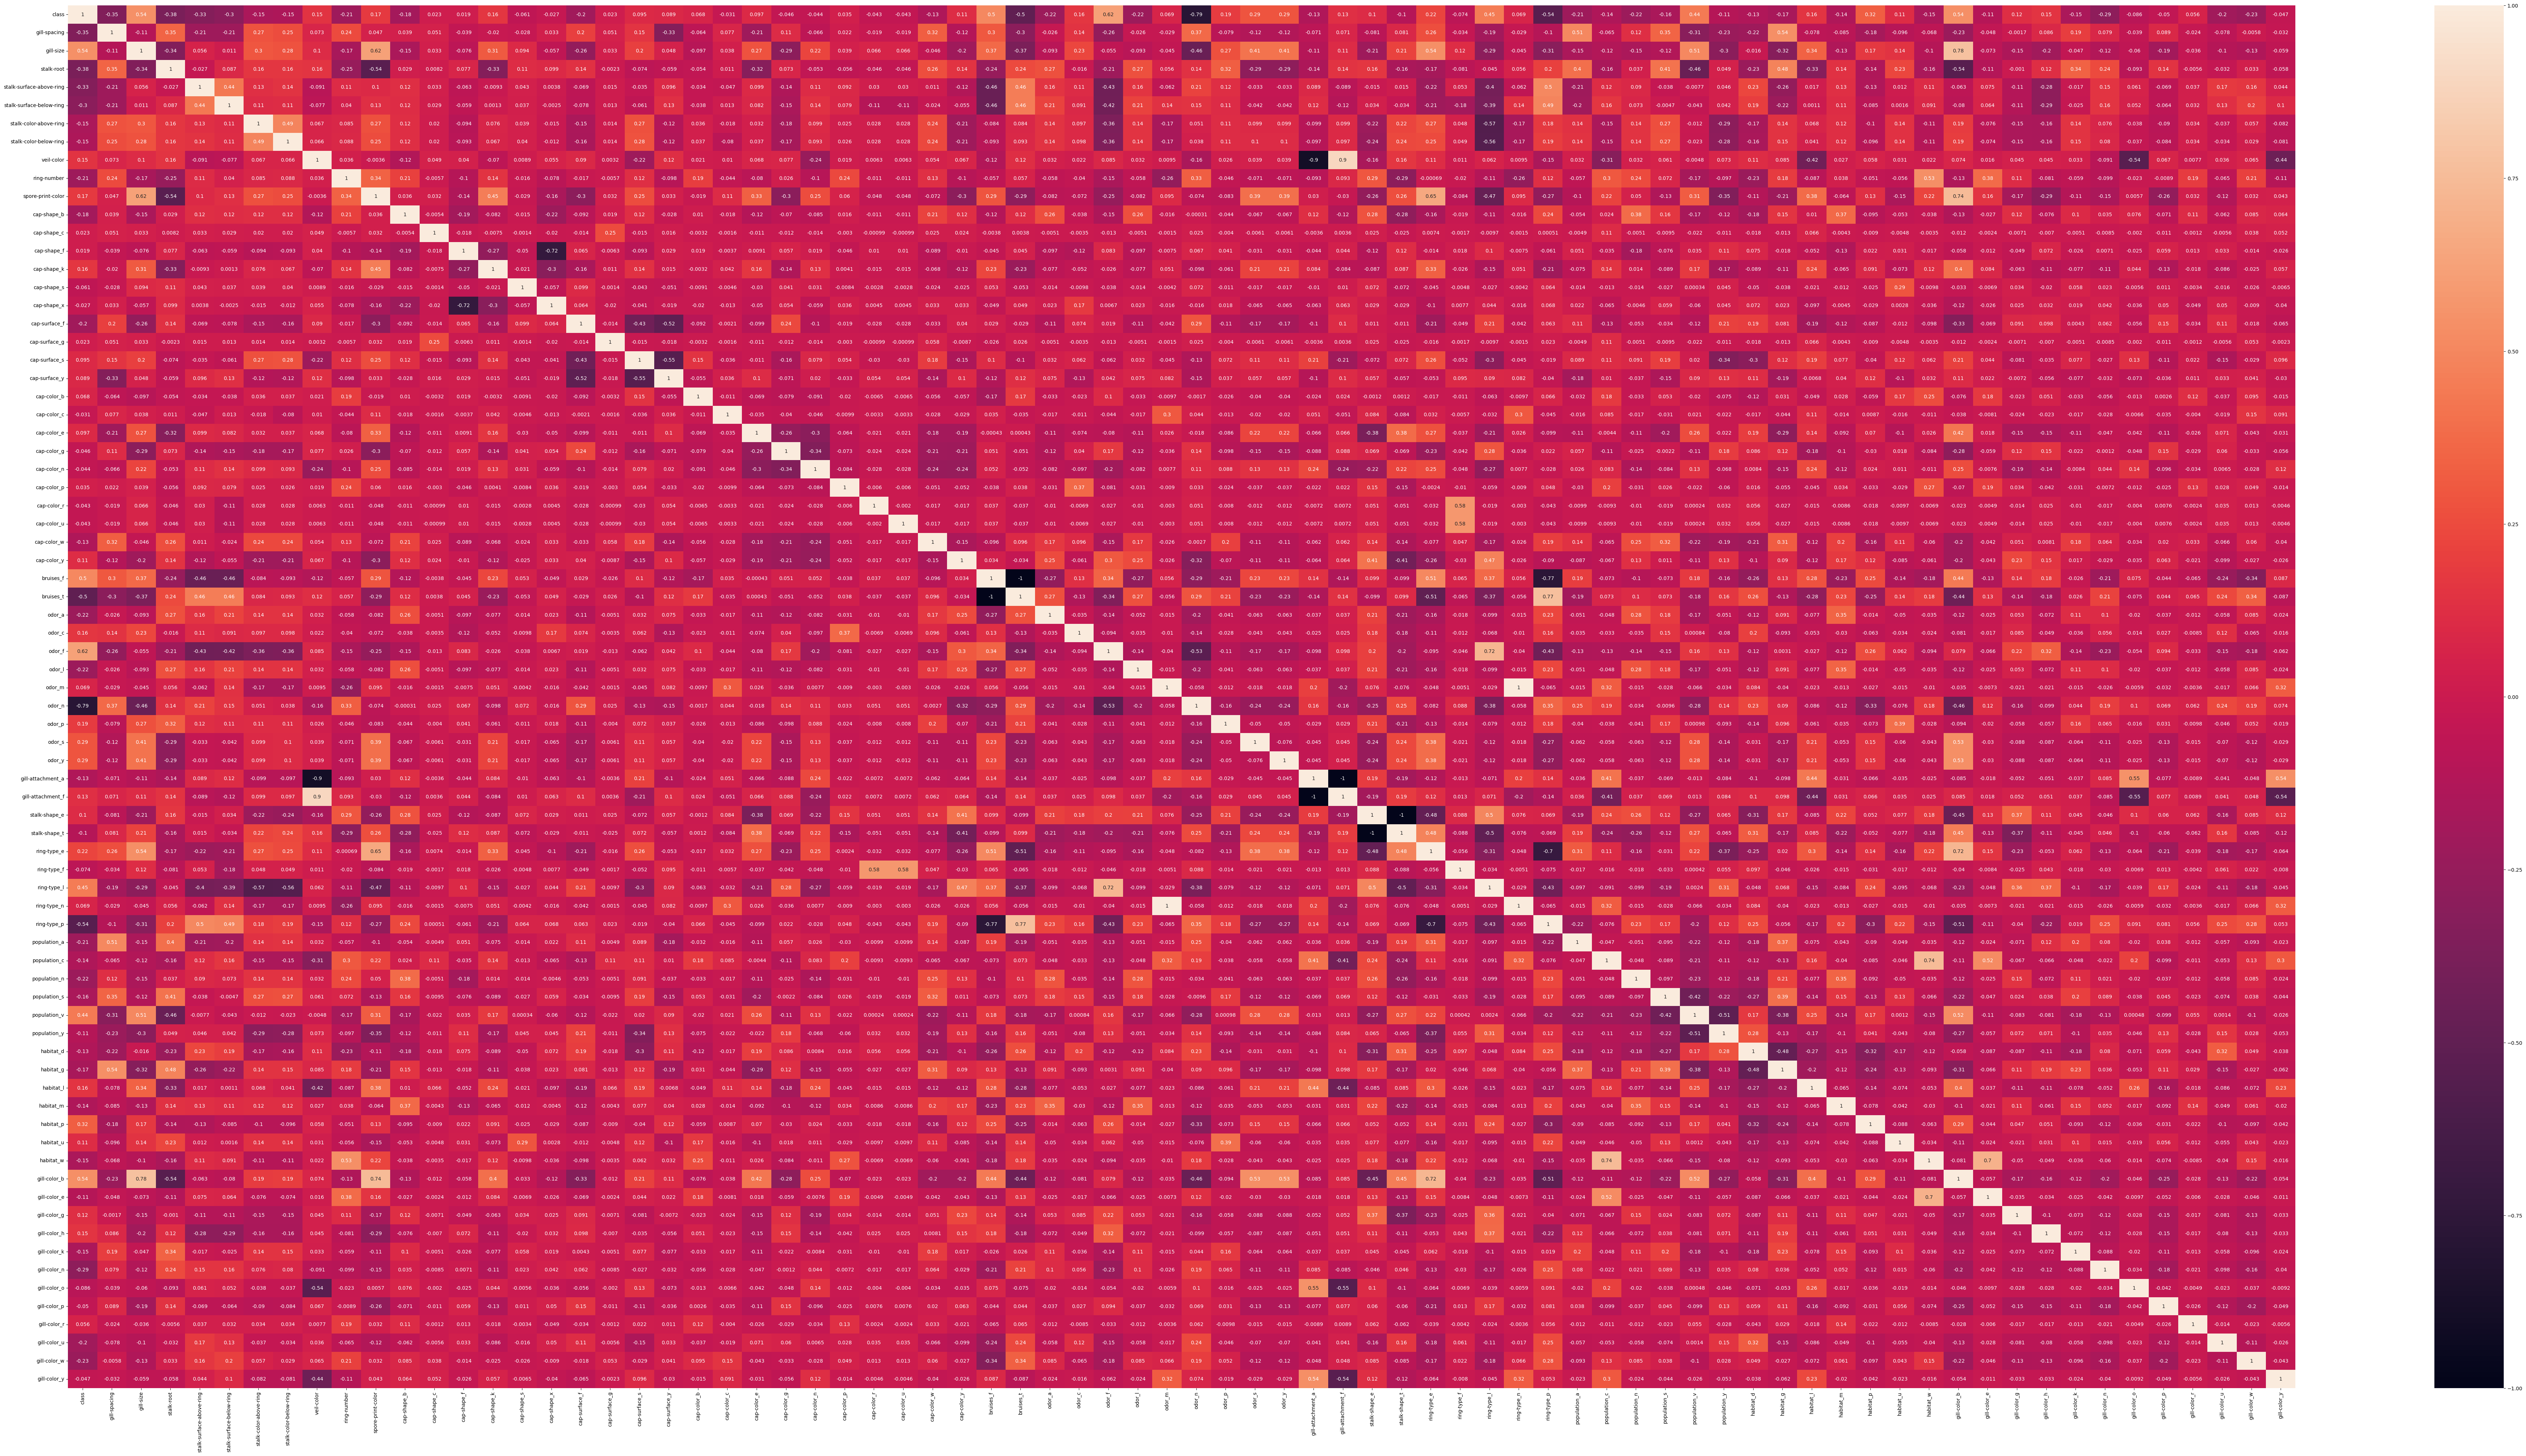

In [26]:
# This code creates a heatmap visualization of the correlation matrix for the DataFrame 'df_encoded' 
plt.figure(figsize=(100, 50))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

# Data Visualisation 

In [27]:
# Before encoded value counts of 'class' column
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [28]:
# After encoded value counts of 'class' column
df_encoded['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

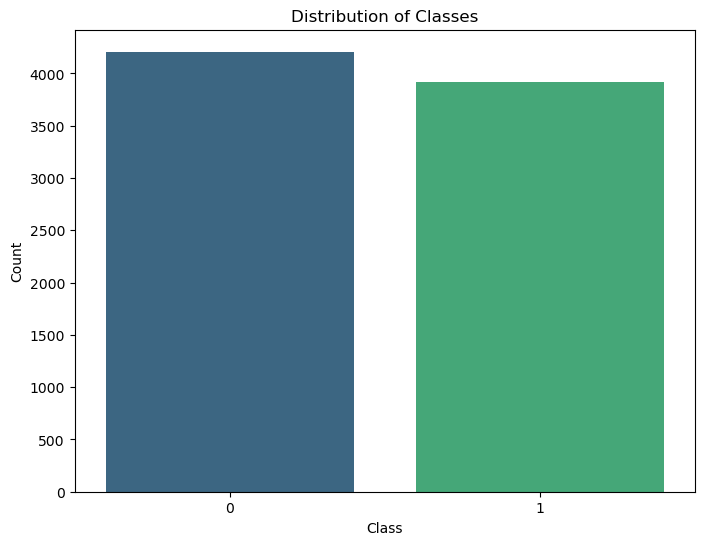

In [29]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'class' column
sns.countplot(x='class', data=df_encoded, palette='viridis')

# Set plot labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')

# Display the plot
plt.show()

In [30]:
# Before encoded value counts of 'gill-size' column
df['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [31]:
# After encoded value counts of 'gill-size' column
df_encoded['gill-size'].value_counts()

0    5612
1    2512
Name: gill-size, dtype: int64

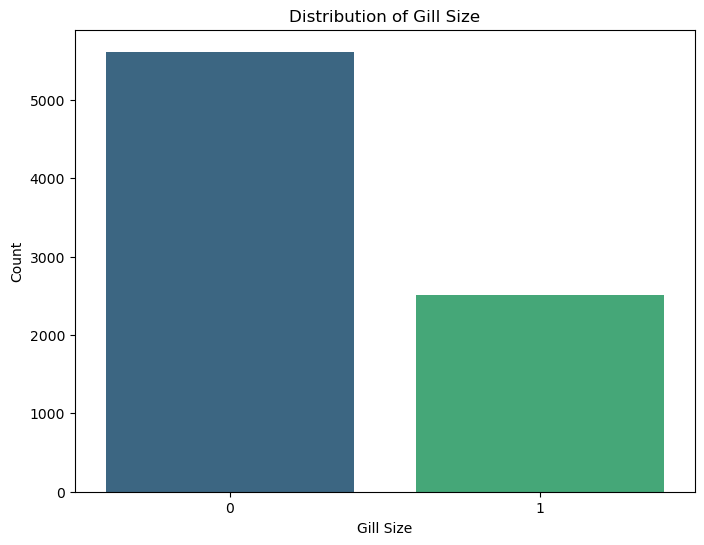

In [32]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'gill-size' column
sns.countplot(x='gill-size', data=df_encoded, palette='viridis')

# Set plot labels and title
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.title('Distribution of Gill Size')

# Display the plot
plt.show()

In [33]:
# Before encoded value counts of 'gill-spacing' column
df['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [34]:
# After encoded value counts of 'gill-spacing' column
df_encoded['gill-spacing'].value_counts()

0    6812
1    1312
Name: gill-spacing, dtype: int64

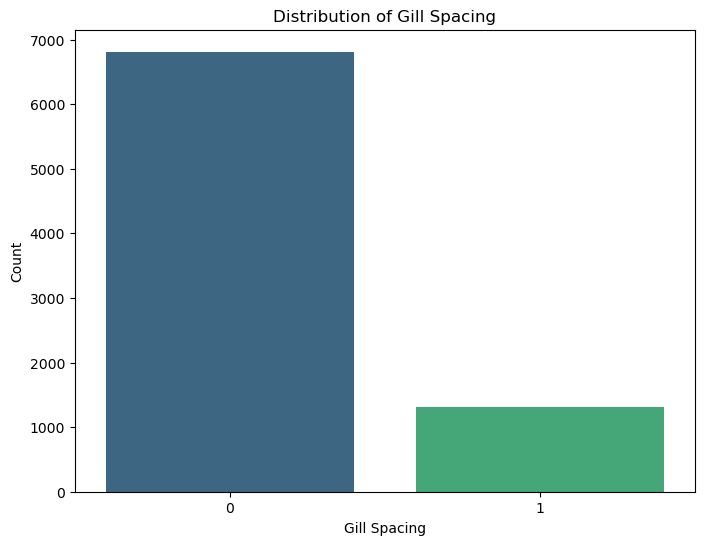

In [35]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'gill-spacing' column
sns.countplot(x='gill-spacing', data=df_encoded, palette='viridis')

# Set plot labels and title
plt.xlabel('Gill Spacing')
plt.ylabel('Count')
plt.title('Distribution of Gill Spacing')

# Display the plot
plt.show()

In [36]:
# Before encoded value counts of 'stalk-root' column
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [37]:
# After encoded value counts of 'stalk-root' column
df_encoded['stalk-root'].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

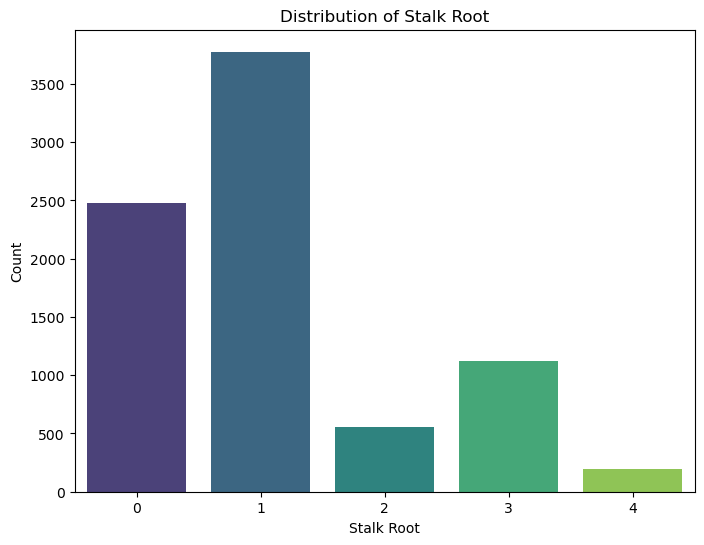

In [38]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'stalk-root' column
sns.countplot(x='stalk-root', data=df_encoded, palette='viridis')

# Set plot labels and title
plt.xlabel('Stalk Root')
plt.ylabel('Count')
plt.title('Distribution of Stalk Root')

# Display the plot
plt.show()

In [39]:
# Before encoded value counts of 'stalk-surface-above-ring' column
df['stalk-surface-above-ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [40]:
# After encoded value counts of 'stalk-surface-above-ring' column
df_encoded['stalk-surface-above-ring'].value_counts()

2    5176
1    2372
0     552
3      24
Name: stalk-surface-above-ring, dtype: int64

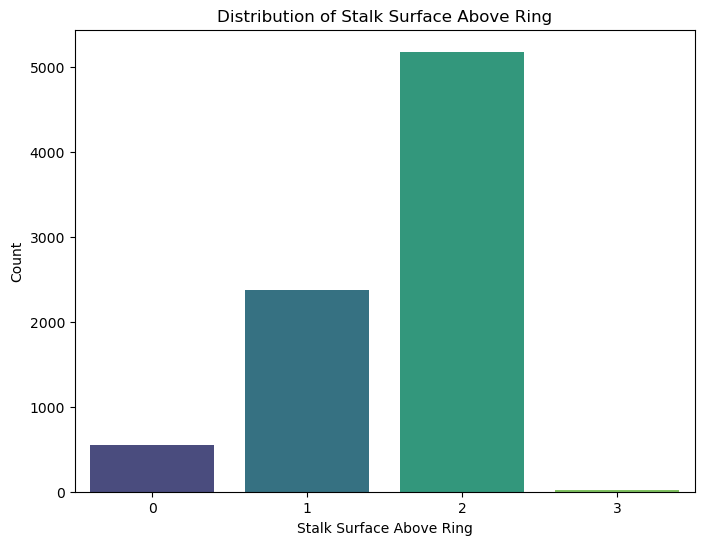

In [41]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'stalk-surface-above-ring' column
sns.countplot(x='stalk-surface-above-ring', data=df_encoded, palette='viridis')

# Set plot labels and title
plt.xlabel('Stalk Surface Above Ring')
plt.ylabel('Count')
plt.title('Distribution of Stalk Surface Above Ring')

# Display the plot
plt.show()

In [42]:
# Value counts of 'ring-type' column
df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

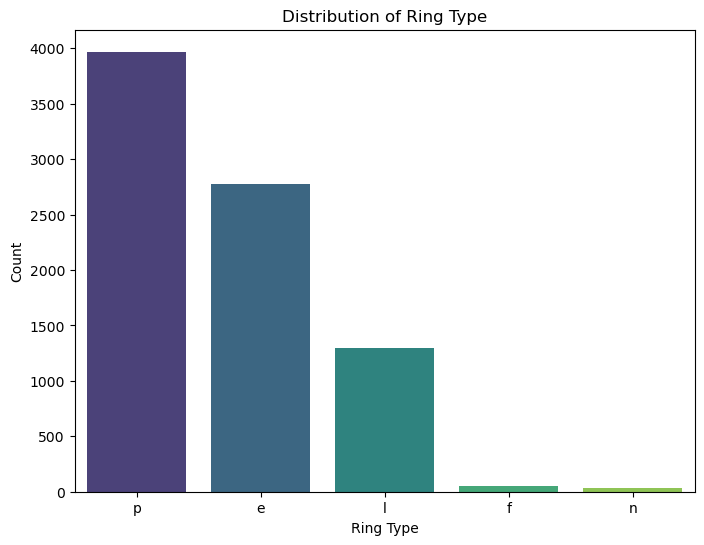

In [43]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'ring-type' column
sns.countplot(x='ring-type', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Ring Type')
plt.ylabel('Count')
plt.title('Distribution of Ring Type')

# Display the plot
plt.show()

In [44]:
# Value counts of 'odor' column
df['odor'].value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

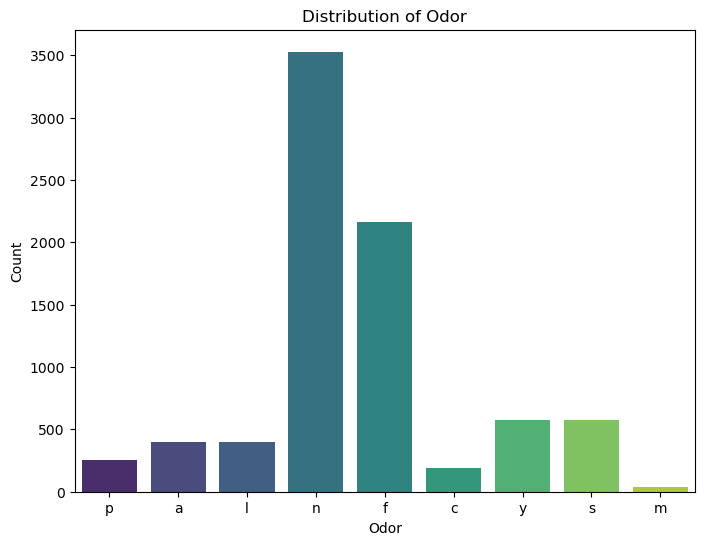

In [45]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'odor' column
sns.countplot(x='odor', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Odor')
plt.ylabel('Count')
plt.title('Distribution of Odor')

# Display the plot
plt.show()

In [46]:
# Value counts of 'population' column
df['population'].value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

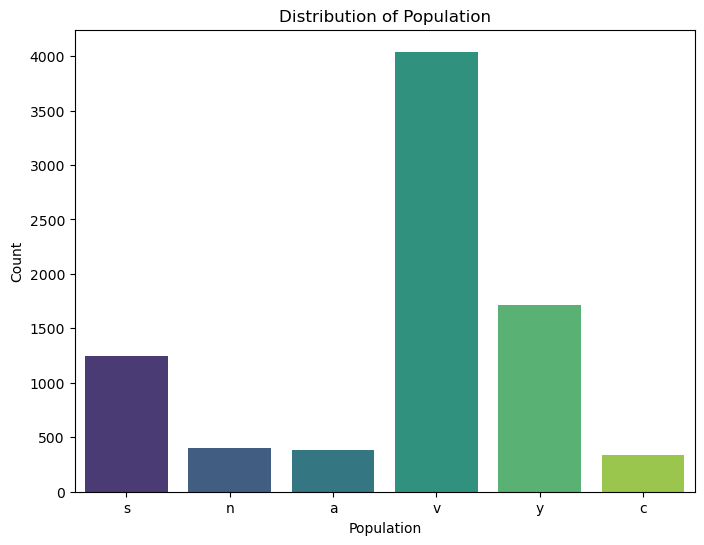

In [47]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'population' column
sns.countplot(x='population', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('Distribution of Population')

# Display the plot
plt.show()

In [48]:
# Value counts of 'gill-color' column
df['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

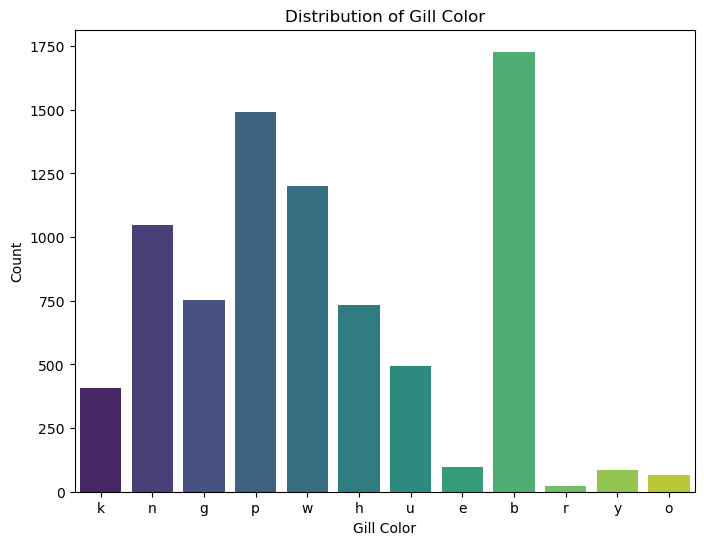

In [49]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 6))  

# Plot a bar plot for the 'gill-color' column
sns.countplot(x='gill-color', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.title('Distribution of Gill Color')

# Display the plot
plt.show()

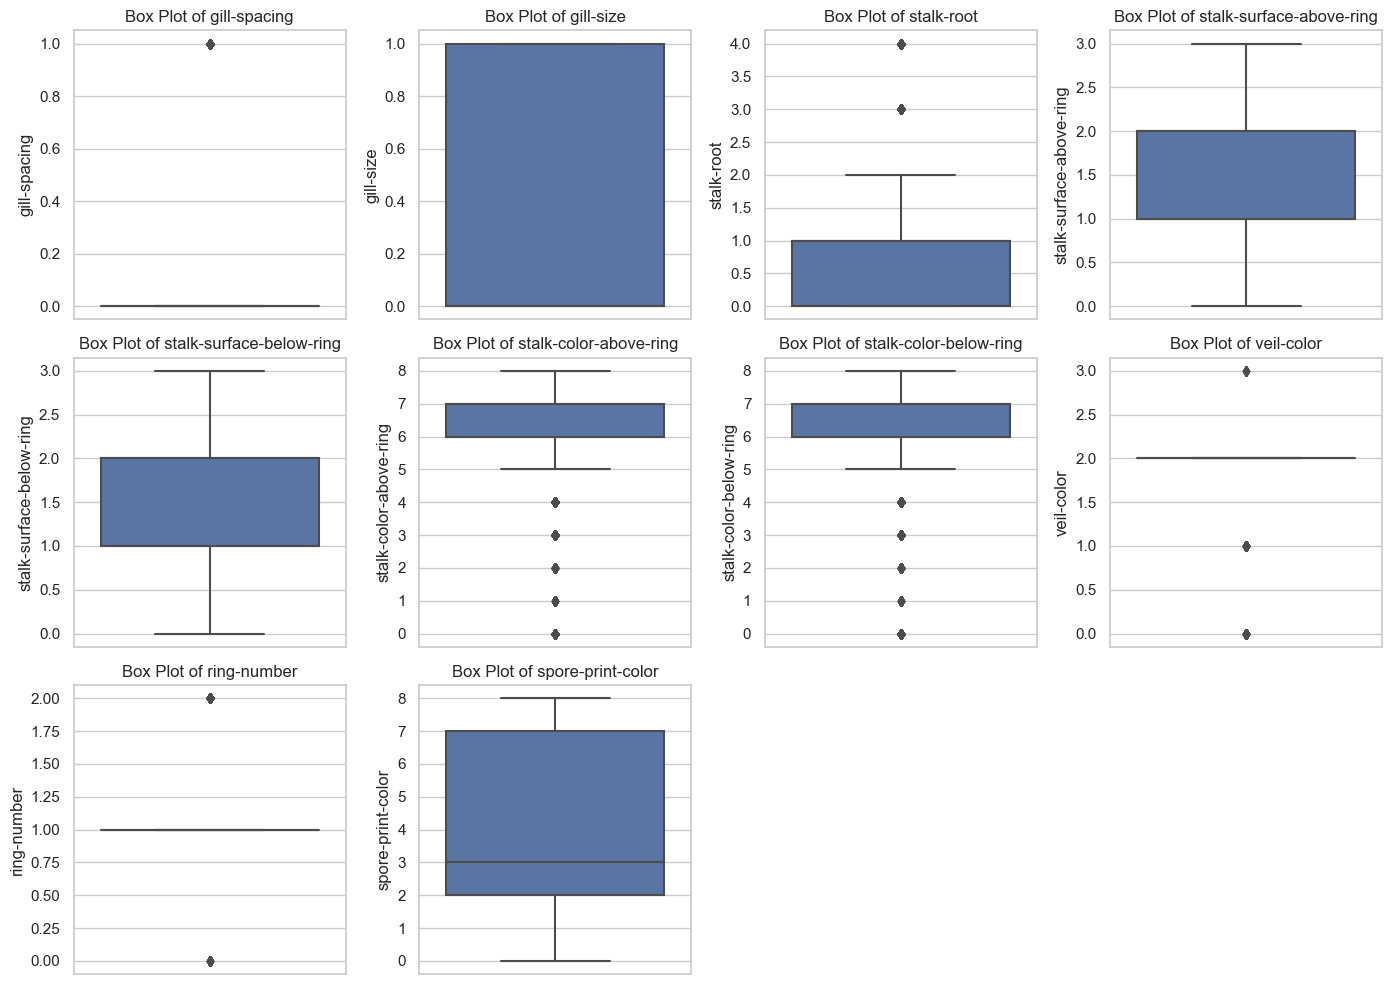

In [50]:
# List of columns for box plot to check the outliers
columns_for_boxplot = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']

# Set up the plotting environment
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(3, 3+1, i)  # Adjusted the subplot layout to 3 rows and 3 + 1columns
    sns.boxplot(y=df_encoded[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Handling Outliers

In [51]:
# List of columns for which you want to apply capping
columns_for_capping = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']

# Define a function for capping
def cap_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return x.clip(lower=lower_bound, upper=upper_bound)

# Apply the capping function to the specified columns
df_encoded[columns_for_capping] = df_encoded[columns_for_capping].apply(cap_outliers)

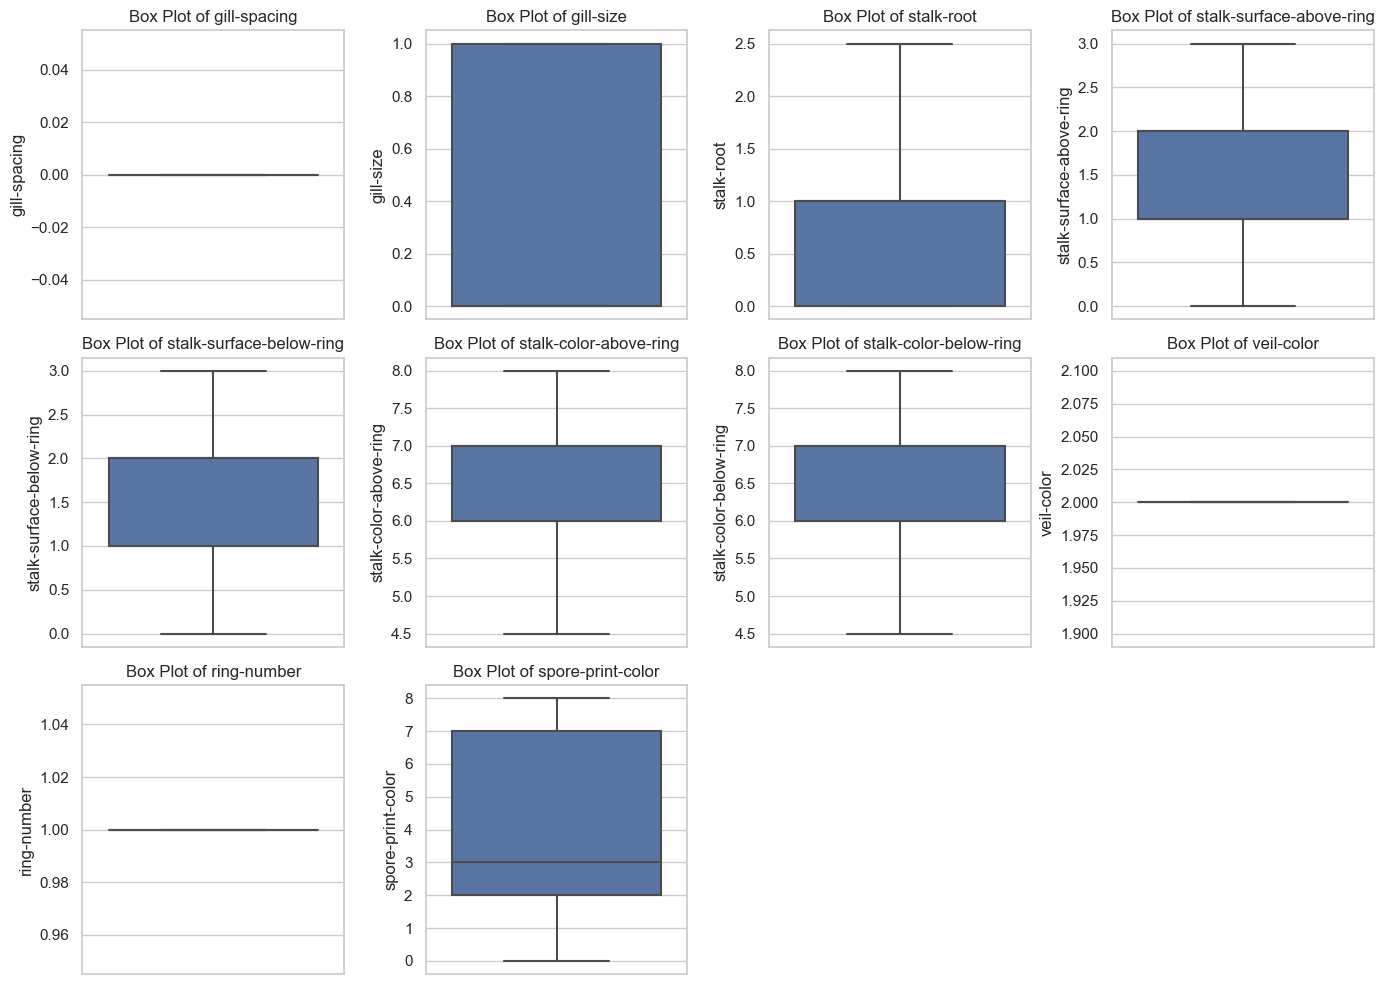

In [52]:
# List of columns for box plot after handling the outlier
columns_for_boxplot = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']

# Set up the plotting environment
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(3, 3+1, i)  # Adjusted the subplot layout to 3 rows and 3 columns
    sns.boxplot(y=df_encoded[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

## Understanding Distribution of Data

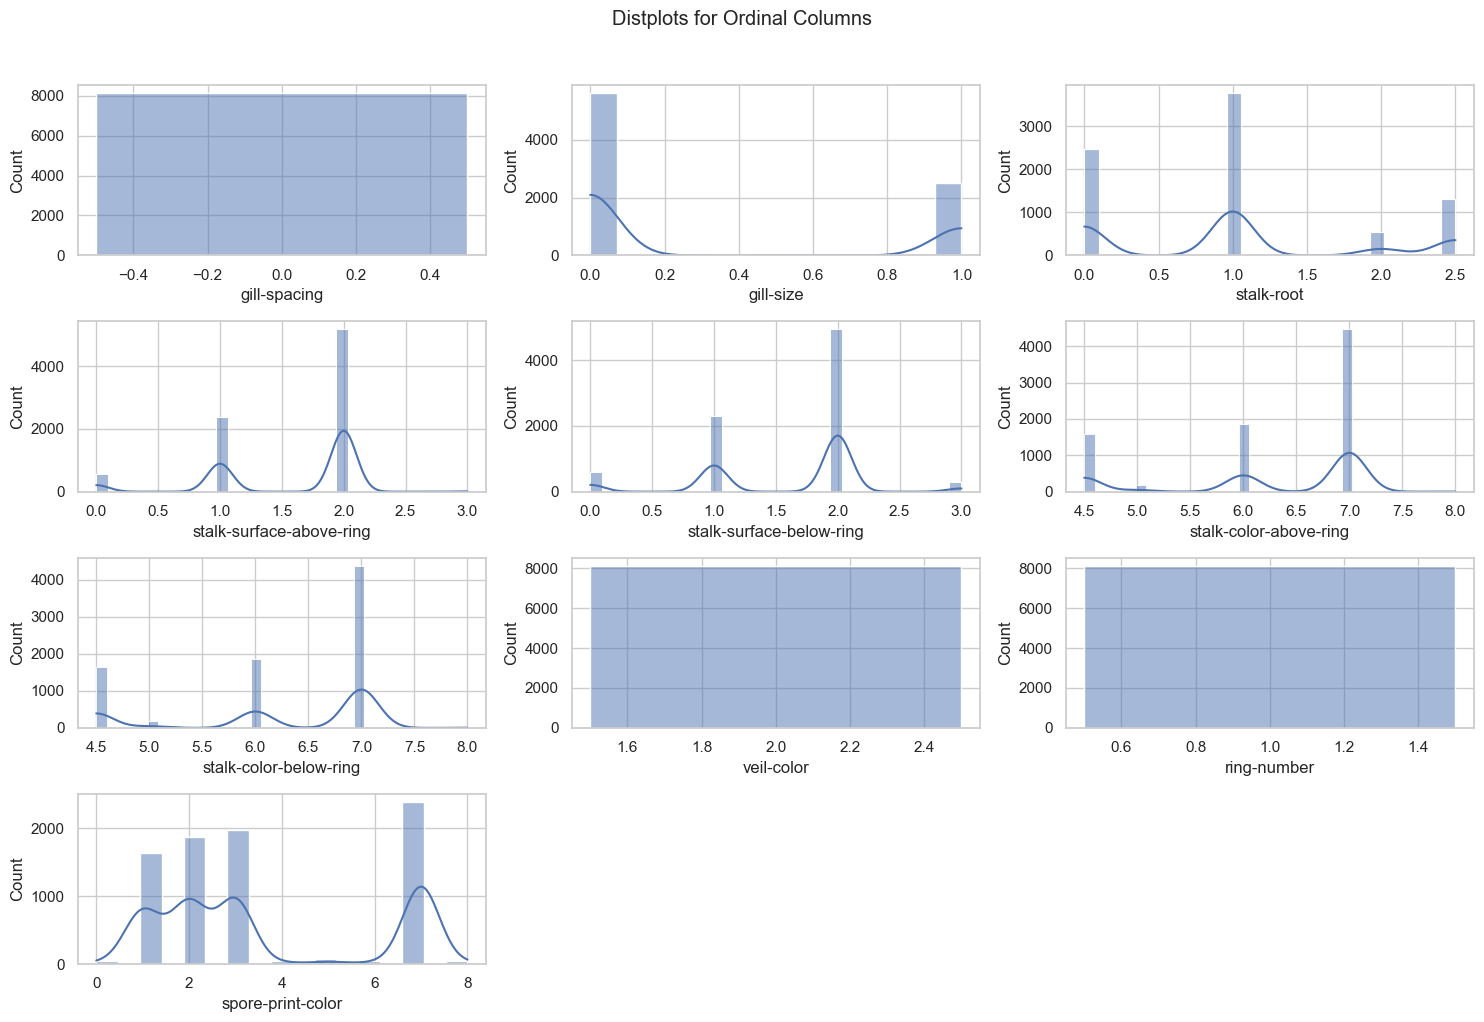

In [53]:
# List of columns for distplot to check distribution of data
columns_for_distplot = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']


# Distplots for the specified columns
plt.figure(figsize=(15, 10))  # Set the size of the figure

for column in columns_for_distplot:
    plt.subplot(4, 3, columns_for_distplot.index(column) + 1)  # Adjust the layout
    sns.histplot(df_encoded[column], kde=True)  # Create a distplot

# Adding title and adjusting layout
plt.suptitle('Distplots for Ordinal Columns', y=1.02)
plt.tight_layout()

# Show the plots
plt.show()

# Standardization

In [54]:
# List of columns for standardization
columns_for_standardize = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']
# Applying Standardization
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform them
df_encoded[columns_for_standardize] = scaler.fit_transform(df_encoded[columns_for_standardize])

In [55]:
# scaler.mean_ stores the means of the original features after scaling or standardization
scaler.mean_

array([0.        , 0.30920729, 1.00541605, 1.57508616, 1.60364353,
       6.23461349, 6.21688823, 2.        , 1.        , 3.59675037])

In [56]:
# List of columns for describe
columns_for_describe = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']

subset_df = df_encoded[columns_for_describe]

# Use describe on the subset
column_descriptions = np.round(subset_df.describe(), 1)

# Display the descriptions
column_descriptions

gill-spacing  gill-size  stalk-root  stalk-surface-above-ring  \
count        8124.0     8124.0      8124.0                    8124.0   
mean            0.0       -0.0        -0.0                      -0.0   
std             0.0        1.0         1.0                       1.0   
min             0.0       -0.7        -1.2                      -2.5   
25%             0.0       -0.7        -1.2                      -0.9   
50%             0.0       -0.7        -0.0                       0.7   
75%             0.0        1.5        -0.0                       0.7   
max             0.0        1.5         1.7                       2.3   

       stalk-surface-below-ring  stalk-color-above-ring  \
count                    8124.0                  8124.0   
mean                        0.0                    -0.0   
std                         1.0                     1.0   
min                        -2.4                    -1.8   
25%                        -0.9                    -0.2   
50%                         0.6                     0.8   
75%                         0.6                     0.8   
max                         2.1                     1.8   

       stalk-color-below-ring  veil-color  ring-number  spore-print-color  
count                  8124.0      8124.0       8124.0             8124.0  
mean                      0.0         0.0          0.0               -0.0  
std                       1.0         0.0          0.0                1.0  
min                      -1.7         0.0          0.0               -1.5  
25%                      -0.2         0.0          0.0               -0.7  
50%                       0.8         0.0          0.0               -0.3  
75%                       0.8         0.0          0.0                1.4  
max                       1.8         0.0          0.0                1.8

## Checking Distribution of Data After Standardization

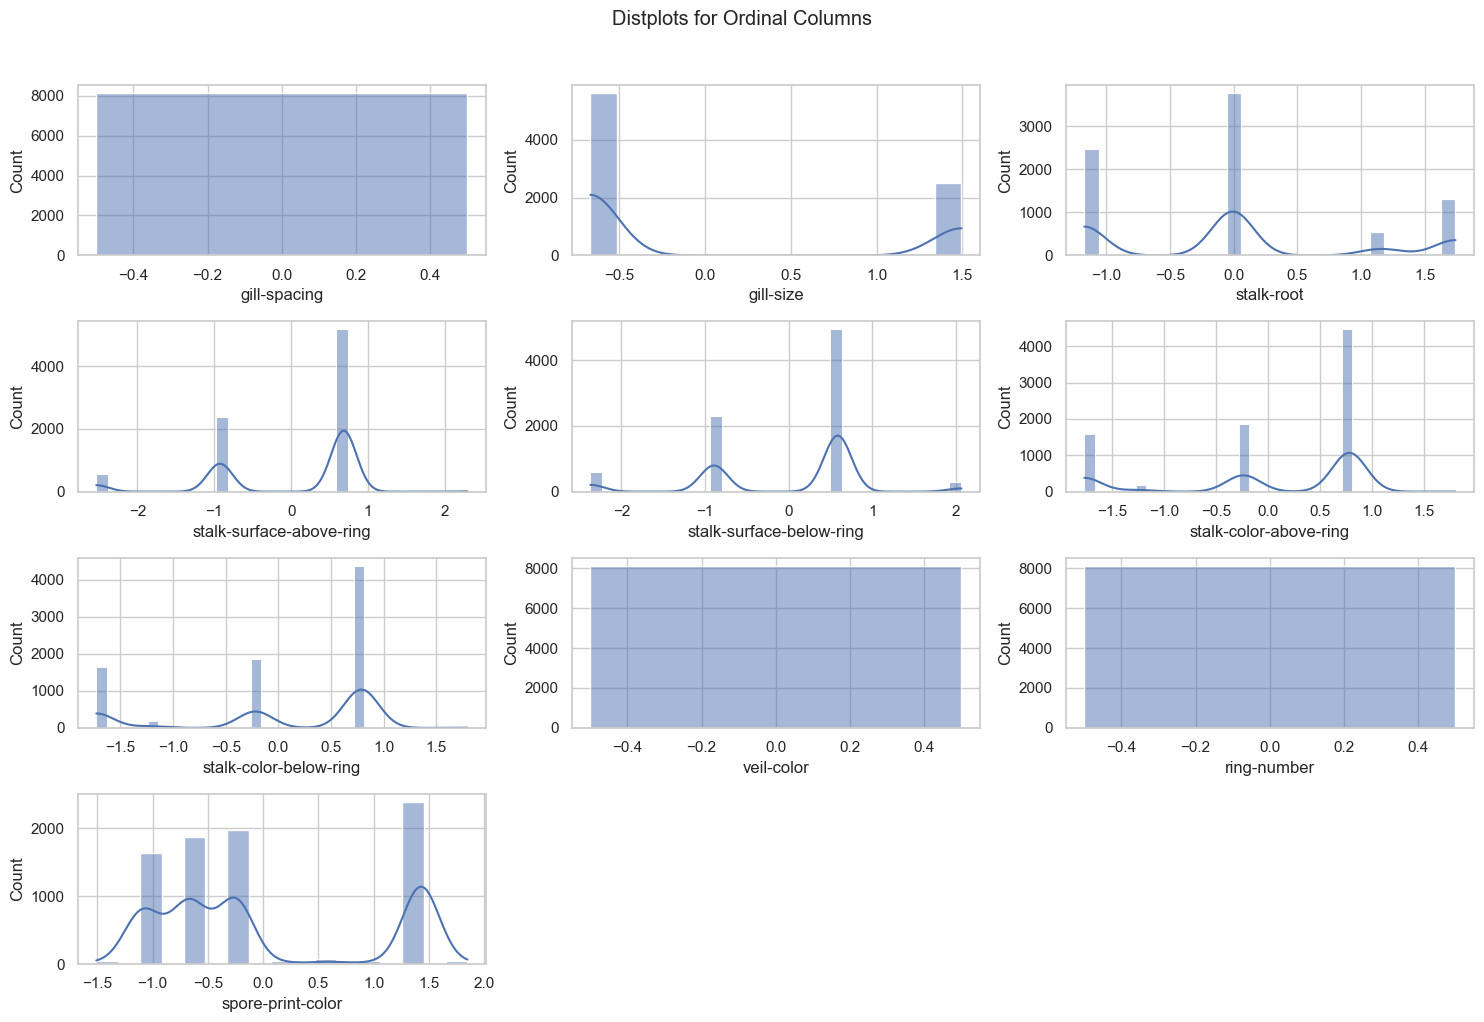

In [57]:
# List of columns for distplot after standardization
columns_for_distplot = ['gill-spacing', 'gill-size', 'stalk-root',
                              'stalk-surface-above-ring', 'stalk-surface-below-ring',
                              'stalk-color-above-ring', 'stalk-color-below-ring',
                              'veil-color', 'ring-number', 'spore-print-color']


# Distplots for the specified columns
plt.figure(figsize=(15, 10))  # Set the size of the figure

for column in columns_for_distplot:
    plt.subplot(4, 3, columns_for_distplot.index(column) + 1)  # Adjust the layout
    sns.histplot(df_encoded[column], kde=True)  # Create a distplot

# Adding title and adjusting layout
plt.suptitle('Distplots for Ordinal Columns', y=1.02)
plt.tight_layout()

# Show the plots
plt.show()

# Splitting Data into Training and Testing 

In [58]:
# Splitting the data
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

In [59]:
# train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# See the shape of X_train and X_test data
X_train.shape, X_test.shape

((6499, 75), (1625, 75))

In [61]:
# See the shape of y_train and y_test data
y_train.shape, y_test.shape

((6499,), (1625,))

# Logistic Regression Algorithm

In [62]:
# Create a Logistic Regression 
model_LR = LogisticRegression()

# Train the model on training set
model_LR.fit(X_train, y_train)

# Evaluate the accuracy of the model
pred = model_LR.predict(X_test)
print(accuracy_score(y_test, pred))

# Print other evaluation metrics like confusion matrix and classification report 
confusion = confusion_matrix(y_test, pred)
print('\n',confusion)

print('\n',classification_report(y_test, pred))

1.0

 [[843   0]
 [  0 782]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


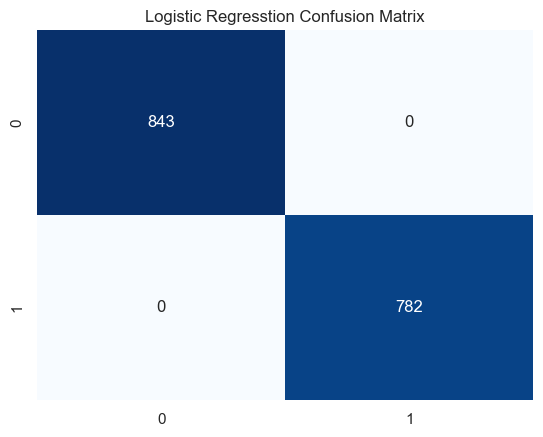

In [63]:
y_pred = model_LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,model_LR.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix');

# Random Forest Classifier Algorithm

In [64]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print other evaluation metrics like classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
[[843   0]
 [  0 782]]


Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


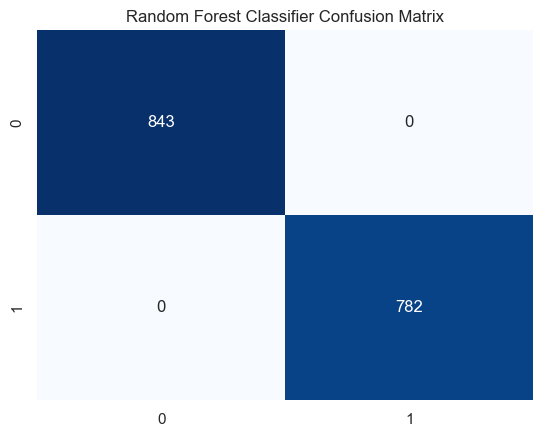

In [65]:
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,rf_classifier.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Classifier Confusion Matrix');

# Decision Tree Classifier Algorithm

In [66]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print other evaluation metrics like classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
[[843   0]
 [  0 782]]


Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


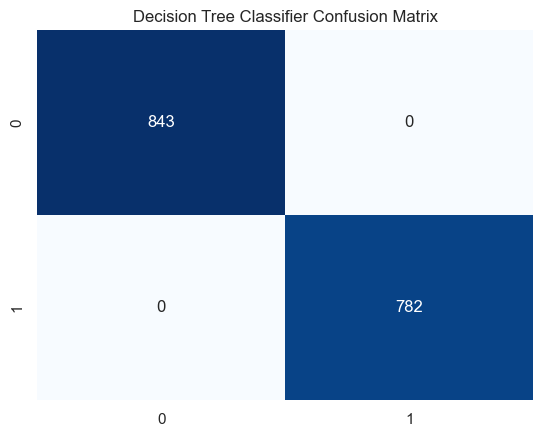

In [67]:
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,dt_classifier.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Classifier Confusion Matrix');